In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
import os

data_dir = './flowers'
num_classes = len(os.listdir(data_dir))
print(num_classes)

12


In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
class_names=data.class_names
print(data.class_names)  #Names of classes
print(len(data.class_names))  # Number of classes

Found 960 files belonging to 12 classes.
['bluebell', 'buttercup', 'crocus', 'daffodil', 'daisy', 'dandelion', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tulip']
12


In [ ]:
#Train/Test split
# Parameters
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2
seed = 123 # For reproducibility
# Load Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=validation_split,
subset="training",
seed=seed,
image_size=(img_height, img_width),
batch_size=batch_size
)
# Load Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=validation_split,
subset="validation",
seed=seed,
image_size=(img_height, img_width),
batch_size=batch_size
)


Found 960 files belonging to 12 classes.
Using 768 files for training.
Found 960 files belonging to 12 classes.
Using 192 files for validation.


In [5]:
#optimizing training loop
AUTOTUNE = tf.data.AUTOTUNE
#Now TensorFlow automatically figures out the best 
# number of parallel calls or buffer size based 
# on available system resources (CPU, RAM, Disk speed).
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
#normalization
from tensorflow.keras.layers import Rescaling
normalization_layer = Rescaling(1./255)
#lambda is an anonymous function i.e., a short inline function without a name.
#lambda arguments: expression
#def some_func(arguments):
#    return expression
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


from tensorflow.keras.utils import to_categorical

# But with tf.data.Dataset it's better to do:

train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))




In [ ]:
# defining the CNN model
#from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras import layers, models
# Build Model
model = Sequential([Input(shape=(180,180,3)),
Conv2D(16, kernel_size=(5,5), activation='relu', strides=(2,2)),#32 filters each of size 3X3
MaxPooling2D(pool_size=(2,2), strides=(2,2)), #default option strides=pool size, 
Conv2D(6,kernel_size=(3,3), strides=(2,2),activation='relu'),
MaxPooling2D(pool_size=(2,2), strides=(2,2)), #no need for count of filters
Conv2D(128, 3, activation='relu'),
MaxPooling2D(),
Flatten(),
Dense(128, activation='relu'),
Dense(len(class_names), activation='softmax') # Output layer
])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras import layers, models
# Build Model
model2 = Sequential([Input(shape=(45,45,1)),
Conv2D(16, kernel_size=(5,5), activation='relu', strides=(2,2)),#16 filters each of size 5X5
MaxPooling2D(pool_size=(2,2), strides=(2,2)), #default option strides=pool size, count of filter=16
Conv2D(6,kernel_size=(3,3), strides=(2,2),activation='relu'),
MaxPooling2D(pool_size=(2,2), strides=(2,2)), #no need for count of filters as 6 same as Conv2D filter count
Conv2D(128, 3, activation='relu'),
MaxPooling2D(),
Flatten(),
Dense(128, activation='relu'),
Dense(len(class_names), activation='softmax') # Output layer
])

In [16]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 6)        │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 6)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 0, 0, 128)      │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 0, 0, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,002 (39.07 KB)

 Trainable params: 10,002 (39.07 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compile Model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [32]:
#Train model

history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#Completed all 24 batches of data (each with 32 samples except possibly the last one) for this epoch.
#24 batches processed out of 24 total batches in train_ds for this epoch
#training data has roughly 24 * 32 = 768 images (estimate)
#If total samples = 750; Batch size = 32; 750 // 32 = 23 full batches; 
# Remaining = 750 - (32*23) = 18 samples in last batch → Total 24 batches.


Epoch 1/10


24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.0775 - loss: 2.4873 - val_accuracy: 0.0781 - val_loss: 2.4866
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 0.0808 - loss: 2.4848 - val_accuracy: 0.0417 - val_loss: 2.4877
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.0878 - loss: 2.4850 - val_accuracy: 0.0417 - val_loss: 2.4897
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.0963 - loss: 2.4853 - val_accuracy: 0.0417 - val_loss: 2.4916
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.0877 - loss: 2.4850 - val_accuracy: 0.0417 - val_loss: 2.4996
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.0913 - loss: 2.4843 - val_accuracy: 0.0417 - val_loss: 2.4960
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.0910 - loss: 2.4867 - val_accuracy: 0.0417 - val_loss: 2.4945
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.0934 - loss: 2.4833 - val_accuracy: 0.0417 -

In [14]:
# Evaluate
model.evaluate(val_ds)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5987 - loss: 2.1046


[1.844375491142273, 0.6302083134651184]

In [24]:
history

In [33]:
import pandas as pd
history_df=pd.DataFrame(history.history)

In [34]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.076823,2.486637,0.078125,2.486574
1,0.082031,2.485306,0.041667,2.487690
2,0.093750,2.484483,0.041667,2.489719
3,0.093750,2.484271,0.041667,2.491587
4,0.093750,2.484331,0.041667,2.499583
5,0.093750,2.484119,0.041667,2.495993
6,0.093750,2.484186,0.041667,2.494459
7,0.093750,2.484655,0.041667,2.500196
8,0.093750,2.483800,0.041667,2.497239
9,0.093750,2.483862,0.041667,2.495637


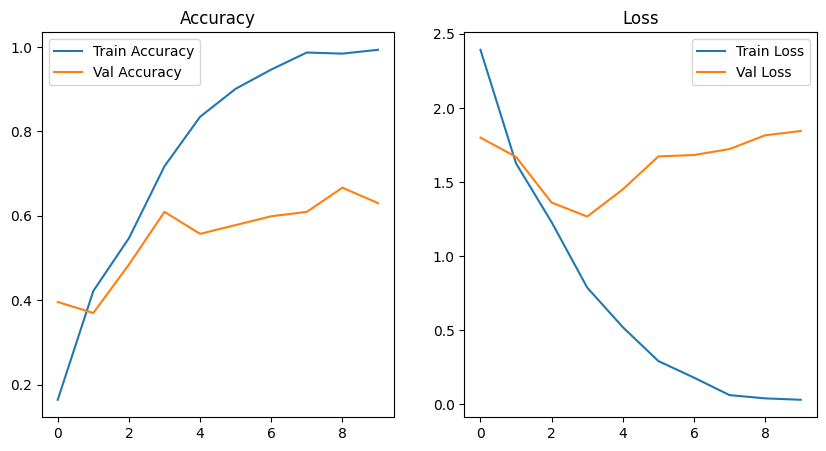

In [15]:
import matplotlib.pyplot as plt
# Plot Accuracy & Loss
plt.figure(figsize=(10,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()